In [89]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
#Import & Setting API Key
import quandl
quandl.ApiConfig.api_key = "INSERT KEY"

In [90]:
gnp = quandl.get("FRED/GNP")
nyse = quandl.get("WFE/MKTCAP_NYSE", authtoken="MURoGYs1JzafQDxyfoQN")
nasdaq = quandl.get("WFE/MKTCAP_NASDAQUS", authtoken="MURoGYs1JzafQDxyfoQN")

In [91]:
date = []
for i in range(len(nasdaq.index)):
    new_date = nasdaq.index[i] + datetime.timedelta(days=1)
    date.append(new_date)

nasdaq.index = date
nasdaq

,Value
2003-02-01,1932026.26
2003-03-01,1978029.66
2003-04-01,1976175.27
2003-05-01,2143054.35
2003-06-01,2254227.32
2003-07-01,2292018.55
2003-08-01,2455020.29
2003-09-01,2672000.08
2003-10-01,2644452.13
2003-11-01,2671689.75


In [92]:
date1 = []
for i in range(len(nyse.index)):
    #make sure dates align with Nasdaq above
    new_date = nyse.index[i] + datetime.timedelta(days=1)
    date1.append(new_date)

nyse.index = date1
nyse

,Value
2003-02-01,8779485.70
2003-03-01,8542521.50
2003-04-01,8620701.80
2003-05-01,9230680.70
2003-06-01,9722904.30
2003-07-01,9865615.20
2003-08-01,10061993.60
2003-09-01,10228121.70
2003-10-01,10119388.30
2003-11-01,10669798.10


In [93]:
df1 = nyse + nasdaq
df1.fillna(method="pad")
#fill with latest value
df1[np.isnan(df1)] = 35239354.93

df1["GNP"] = gnp
df1["Market Cap / GNP"] = df1["Value"] / df1["GNP"] / 1000

df = df1[np.isfinite(df1['Market Cap / GNP'])]

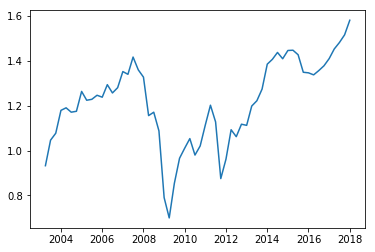

In [94]:
x = df.index
y = df['Market Cap / GNP']
plt.plot(x, y)
plt.show()

In [95]:
#70-80%: buying stocks is likely to work very well for you
#>200%: you are playing with fire

In [96]:
#ratio today
#ratio = df.loc["2018-01-01"]["Market Cap / GNP"]
ratio = / 2309
print("Market Cap/GNP ratio today: {:.2f}x".format(ratio))

#potential upside
upside = 2/ratio-1
print("Potential upside: {:.0%}".format(upside))
    
#potential downside
downside = 0.7/ratio-1
print("Potential downside: {:.0%}".format(downside))

#upside/downside
ud = abs(upside) / abs(downside)
print("Upside/downside ratio: {:.2f}x".format(ud))


Market Cap/GNP ratio today: 1.58x
Potential upside: 26%
Potential downside: -56%
Upside/downside ratio: 0.47x


In [97]:
gnp

,Value
Date,
1947-01-01,244.142
1947-04-01,247.063
1947-07-01,250.716
1947-10-01,260.981
1948-01-01,267.133
1948-04-01,274.046
1948-07-01,280.679
1948-10-01,281.837
1949-01-01,276.420
